In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import roc_curve
import tensorflow as tf

In [4]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Deep Learning Application/heart.csv')

In [10]:
X = data.drop('output', axis=1).values
y = data['output'].values

In [7]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [11]:
X.shape

(1025, 13)

In [14]:
X

array([[52.,  1.,  0., ...,  2.,  2.,  3.],
       [53.,  1.,  0., ...,  0.,  0.,  3.],
       [70.,  1.,  0., ...,  0.,  0.,  3.],
       ...,
       [47.,  1.,  0., ...,  1.,  1.,  2.],
       [50.,  0.,  0., ...,  2.,  0.,  2.],
       [54.,  1.,  0., ...,  1.,  1.,  3.]])

In [15]:
X = X.reshape(X.shape[0], 1, X.shape[1])

In [16]:
X.shape

(1025, 1, 13)

In [17]:
X

array([[[52.,  1.,  0., ...,  2.,  2.,  3.]],

       [[53.,  1.,  0., ...,  0.,  0.,  3.]],

       [[70.,  1.,  0., ...,  0.,  0.,  3.]],

       ...,

       [[47.,  1.,  0., ...,  1.,  1.,  2.]],

       [[50.,  0.,  0., ...,  2.,  0.,  2.]],

       [[54.,  1.,  0., ...,  1.,  1.,  3.]]])

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
X_train.shape

(820, 1, 13)

In [20]:
model = Sequential()
model.add(LSTM(32, input_shape=(X.shape[1], X.shape[2]), return_sequences=True))
model.add(LSTM(32, return_sequences=True))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [21]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1), loss='binary_crossentropy', metrics=['accuracy'])

In [22]:
history=model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - accuracy: 0.5087 - loss: 0.7071 - val_accuracy: 0.5024 - val_loss: 0.7031
Epoch 2/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5003 - loss: 0.6943 - val_accuracy: 0.5024 - val_loss: 0.6948
Epoch 3/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4909 - loss: 0.6953 - val_accuracy: 0.5024 - val_loss: 0.6989
Epoch 4/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4919 - loss: 0.7019 - val_accuracy: 0.5024 - val_loss: 0.6947
Epoch 5/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5315 - loss: 0.6920 - val_accuracy: 0.4976 - val_loss: 0.6933
Epoch 6/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4656 - loss: 0.6951 - val_accuracy: 0.5024 - val_loss: 0.6931
Epoch 7/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5261 - loss: 0.6932 - val_accuracy: 0.5024 - val_loss: 0.6932
Epoch 8/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5109 - loss: 0.6940 - val_accuracy: 0.5024 - val_

In [23]:
y_pred_prob = model.predict(X_test)
y_pred = np.round(y_pred_prob).astype(int)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step


In [24]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.50


In [25]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       102
           1       0.50      1.00      0.67       103

    accuracy                           0.50       205
   macro avg       0.25      0.50      0.33       205
weighted avg       0.25      0.50      0.34       205



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


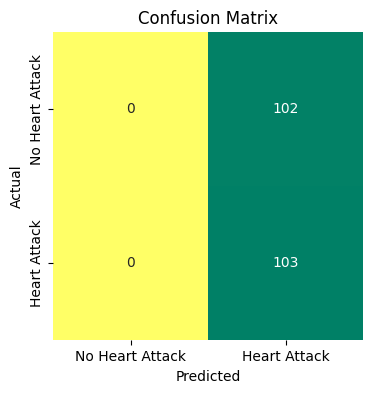

In [26]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='summer_r', cbar=False,
xticklabels=['No Heart Attack', 'Heart Attack'],
yticklabels=['No Heart Attack', 'Heart Attack'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
model.evaluate()